In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [8]:
filepath = '/content/gdrive/MyDrive/data/딥러닝'

In [9]:
data = np.load(filepath+'/data_celeba.npz')

In [10]:
list(data)

['X_data', 'Y_data']

In [11]:
X_data = data['X_data']
Y_data = data['Y_data']

In [12]:
X_data.shape, Y_data.shape

((2000, 72, 59, 3), (2000, 2))

In [13]:
## y값의 성별, 미소여부
y_gender = Y_data[:,0]
y_smile = Y_data[:,1]

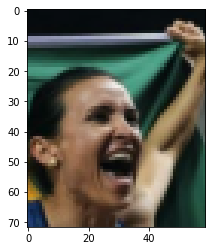

In [14]:
plt.imshow(X_data[0])

In [15]:
X_data.min(), X_data.max()

(0.0, 1.0)

In [25]:
np.unique(Y_data)

array([0, 1], dtype=int8)

------x--------


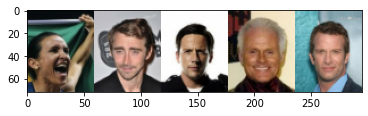

---------y_gender----------
[0 1 1 1 1] [0 1 0 1 1]


In [23]:
print('------x--------')
plt.imshow(np.hstack(X_data[:5]))
plt.show()

print('---------y_gender----------')
print(y_gender[:5], y_smile[:5])


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data, y_gender, 
                                                  test_size = 0.3, random_state = 777)
print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [51]:
## y데이터 분할은 평향없이 잘되었난 확인

y_train.sum(), y_train.sum()

(674, 674)

In [52]:
np.unique(y_train,return_counts=True), np.unique(y_test,return_counts=True)

((array([0, 1], dtype=int8), array([726, 674])),
 (array([0, 1], dtype=int8), array([280, 320])))

In [53]:
import collections, numpy
print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({0: 726, 1: 674})
Counter({1: 320, 0: 280})


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받습니다. 
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (72, 59, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) # 10개의 출력을 가지는 신경망 #나가는값

In [55]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy', # 원핫 안해도 마지막 dense 2개로 할수 있다 
             metrics = ['acc'])

In [58]:
history = model.fit(x_train, y_train,
                    epochs = 15,
                    batch_size = 32,
                    validation_data = (x_test, y_test))

Epoch 1/15
44/44 [==============================] - 43s 986ms/step - loss: 0.4638 - acc: 0.7786 - val_loss: 0.5055 - val_acc: 0.7550
Epoch 2/15
44/44 [==============================] - 43s 986ms/step - loss: 0.4126 - acc: 0.8214 - val_loss: 0.4349 - val_acc: 0.7933
Epoch 3/15
44/44 [==============================] - 43s 990ms/step - loss: 0.3817 - acc: 0.8271 - val_loss: 0.4337 - val_acc: 0.7933
Epoch 4/15
44/44 [==============================] - 43s 988ms/step - loss: 0.3663 - acc: 0.8450 - val_loss: 0.4442 - val_acc: 0.7950
Epoch 5/15
44/44 [==============================] - 43s 989ms/step - loss: 0.3371 - acc: 0.8579 - val_loss: 0.4012 - val_acc: 0.8283
Epoch 6/15
44/44 [==============================] - 44s 995ms/step - loss: 0.2886 - acc: 0.8821 - val_loss: 0.3846 - val_acc: 0.8217
Epoch 7/15
44/44 [==============================] - 43s 988ms/step - loss: 0.2790 - acc: 0.8793 - val_loss: 0.3576 - val_acc: 0.8317
Epoch 8/15
44/44 [==============================] - 44s 991ms/step - 

(72, 59, 3)
male


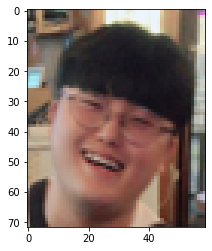

In [205]:
from PIL import Image
class_name = ['male', 'female']

my_image = Image.open(filepath+'/my_image.jpg')
my_image = my_image.resize((59,72)) #pil에서는 너비 높이로 나오기때문에 텐서 input과 반대로 작업해야함
my_image = np.array(my_image)/255

plt.imshow(my_image)
print(my_image.shape)

input_image =my_image.reshape(1,72,59,3)#실제 넣을때 (1, 72, 59, 3) 이므로 바꾸어야함

print(class_name[np.argmax(model.predict(input_image))]) #실제 넣을때 (1, 72, 59, 3) 이므로 바꾸어야함

In [206]:
model.save(filepath+'/celeba_성별웃음.h5')